# Information

Source : https://www.kaggle.com/colearninglounge/employee-attrition

Informasi mengenai dateset inipun dapat dilihat pada laman tersebut.

# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import anderson
from sklearn.preprocessing import LabelEncoder

from explanation import explanation
from func import custom_desc, custom_info, zero_std, categorical_converter

In [2]:
exp = pd.DataFrame(explanation.items(), columns=['Columns', 'Explanation'])
pd.set_option('max_colwidth', 110)
exp

,Columns,Explanation
0,Age,Numerical Value
1,Attrition,"Employee leaving the company (0=no, 1=yes)"
2,BusinessTravel,"(1=No Travel, 2=Travel Frequently, 3=Travel Rarely)"
3,DailyRate,Numerical Value - Salary Level
4,Department,"(1=HR, 2=R&D, 3=Sales)"
5,DistanceFromHome,Numerical Value - THE DISTANCE FROM WORK TO HOME
6,Education,Numerical Value. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')
7,EducationField,"(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)"
8,EmployeeCount,Numerical Value
9,EmployeeNumber,Numerical Value - EMPLOYEE ID


# Import CSV

In [3]:
df = pd.read_csv('csv/employee_attrition_train.csv')
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.shape

(1029, 35)

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,...,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,...,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**Temuan** : Ada feature yang std-nya bernilai 0

# Duplicated data

In [6]:
df.duplicated().sum()

0

**Temuan** : Tidak ditemukan adanya duplikasi data.

Alasan mengapa pengecekan duplikasi data dilakukan di awal adalah karena column EmployeeNumber masih ada (belum di-drop). Jika pengecekan dilakukan setelah EmployeeNumber dihapus, maka ada kemungkinan beberapa data dianggap duplikat.

Contoh kasus: 2 kakak-beradik kembar dengan usia dan jenis kelamin yang sama, berkuliah di tempat yang sama, di jurusan yang sama. Setelah lulus, melamar di tempat yang sama, dan sama-sama diterima di department yang sama dan gaji yang sama. Tinggal di alamat yang sama. Dan anggap saja semua feature value dari 2 kakak-beradik kembar ini sama, dan yang membedakannya hanya EmployeeNumber-nya saja. (Ingat: Dataset ini tidak memiliki nama karyawan. Hanya menggunakan EmployeeNumber sebagai pembeda)

Jika saya lakukan pengecekan duplikasi data setelah EmployeeNumber di drop, maka kasus seperti ini akan dianggap duplikat. Case seperti ini memungkinkan, meskipun kemungkinan kasus seperti ini terjadi kecil.

# std = 0.0

Pada describe() yang kita lakukan sebelumnya, kita menemukan ada feature dengan nilai std = 0. Feature ini akan di-drop karena tidak memberikan advantage apapun disaat kita melakukan EDA ataupun dalam pembuatan model.

Feature dengan std = 0 dianggap tidak memberikan advantage apapun dikarenakan saat std suatu feature bernilai 0, maka isi dari feature tersebut adalah monotone/constant (memiliki nilai yang sama di seluruh row).

Oleh karenanya, kita periksa terlebih dahulu apakah masih ada feature lain yang nilai std-nya bernilai 0.

In [7]:
zero_std(df)

['EmployeeCount', 'StandardHours']

**Temuan** : Ternyata ada 2 feature yang std-nya bernilai 0.

Kita juga bisa menggunakan heatmap untuk melakukan pengecekan std ini. Feature yang std-nya bernilai 0 akan terlihat berwarna putih entah secara vertika ataupun horizontal.

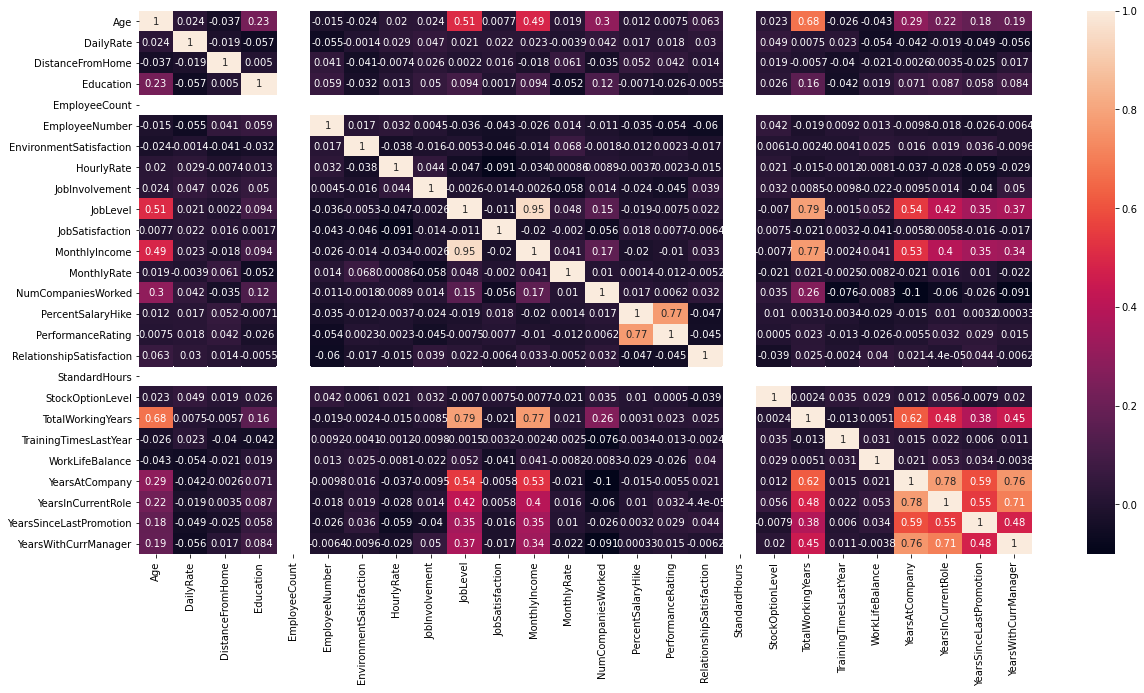

In [8]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True)

Setelah itu, kita drop kedua feature tersebut.

In [9]:
df.drop(zero_std(df), inplace=True, axis=1)

# Another unuseful features

- Feature EmployeeNumber merupakan feature yang berisikan dengan ID dari si pegawai. Oleh karenanya, feature ini akan di-drop.

- Sementara feature Over18, menurut saya, adalah feature yang tidak terlalu berguna. Opini saya ini muncul dikarenakan Over18 adalah feature yang berhubungan dengan usia, sementara feature tentang usia telah diwakilkan oleh feature 'Age'.

In [10]:
df.drop(['Over18', 'EmployeeNumber'], inplace=True, axis=1)

# Features Behaviour (by dtype)

Berikut adalah features mana saja yang categorical.

In [11]:
categorical_features = df.select_dtypes(include='O')
rows,col=(categorical_features.shape)
print("Number of Categorical columns are:",col)
categorical_features.columns

Number of Categorical columns are: 8


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

Sementara dibawah ini adalah yang numerical.

In [12]:
numerical_features = df.select_dtypes(exclude='O')
rows,col=(numerical_features.shape)
print("Number of Numerical columns are:",col)
numerical_features.columns

Number of Numerical columns are: 23


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

**Temuan** : Terdapat 8 Categorical column dan 23 Numerical columns yang anggotanya dapat dilihat pada 2 cell di atas.

In [13]:
custom_info(df[numerical_features.columns])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Age,float64,136,13.22,39,"[59.0, nan, 30.0]"
1,DailyRate,float64,27,2.62,692,"[867.0, 773.0, 1485.0]"
2,DistanceFromHome,float64,95,9.23,27,"[7.0, 25.0, 1.0]"
3,Education,int64,0,0.00,5,"[4, 4, 3]"
4,EnvironmentSatisfaction,int64,0,0.00,4,"[4, 4, 4]"
5,HourlyRate,int64,0,0.00,71,"[87, 92, 46]"
6,JobInvolvement,int64,0,0.00,4,"[3, 3, 3]"
7,JobLevel,int64,0,0.00,5,"[3, 1, 1]"
8,JobSatisfaction,int64,0,0.00,4,"[2, 4, 1]"
9,MonthlyIncome,int64,0,0.00,963,"[6755, 4682, 5021]"


**Temuan** : Apabila kita perhatikan lagi tentang explanasi dari features yang dijelaskan di atas dan fungsi custom_info() sebelumnya, ada pula beberapa feature yang memiliki dtype int64, namun secara behaviour ia adalah categorical. Inilah features yang dimaksud:

- Education,

- EnvironmentSatisfaction,

- JobInvolvement,

- JobLevel,

- JobSatisfaction,

- PerformanceRating,

- RelationshipSatisfaction,

- Stock OptionLevel,

- WorkLifeBalance

# Missing Values

In [14]:
custom_info(df, mode='missing_values_only')

,dataFeatures,dataType,null,nullPct
0,Age,float64,136,13.22
1,BusinessTravel,object,5,0.49
2,DailyRate,float64,27,2.62
3,DistanceFromHome,float64,95,9.23
4,MaritalStatus,object,5,0.49


**Temuan** : Dengan fungsi di atas, kita mengetahui bahwa ternyata ada 5 feature yang memiliki missing values.

Untuk memutuskan tentang bagaimana rows dengan missing value tersebut harus diperlakukan, kita periksa lagi features tersebut menggunakan Heatmap untuk mengetahui korelasinya. 

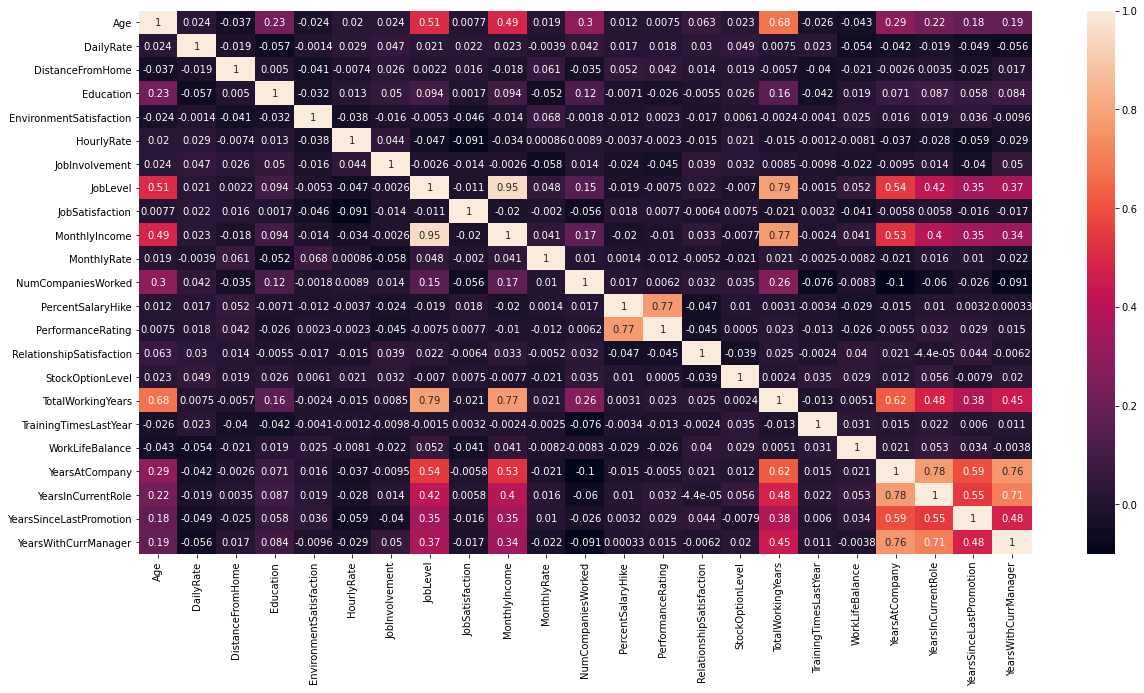

In [15]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True)

**Temuan** dari Hashmap di atas, ada beberapa informasi (berhubungan dengan missing value) yang bisa kita ambil.

- Feature yang memiliki korelasi terbesar dengan feature Age adalah TotalWorkingYears

- DailyRate dan DistanceFromHome tidak memiliki korelasi kuat dengan feature lain.

Dari informasi tersebut, maka metode yang saya gunakan adalah :

- Untuk mengisi Age, saya akan menggunakan feature TotalWorkingYears sebagai acuannya.

- DailyRate dan DistanceFromHome akan diisi dengan statistik deskriptif sesuai dengan hasil dari normality test yang akan kita lakukan.

### Age

In [16]:
def extraction(df, reference_column, target_column):
    # Pada First Extraction, df dibersihkan dari NaN values (jika ada) di reference column
    first_extraction = df[~df[reference_column].isna()]
    
    # Pada Second Extraction, df dibersihkan dari NaN values di reference column dan target column
    second_extraction = first_extraction[~first_extraction[target_column].isna()]
    second_extraction = second_extraction.sort_values([reference_column, target_column], ascending=[False, False])
    
    # Pada Second Extraction data sudah bersih dari NaN value dari reference column maupun target column
    return first_extraction, second_extraction

first, adalah dataframe yang telah bersih dari NaN value di column TotalWorkingYears. <br>
Sementara second, adalah dataframe yang telah bersih dari NaN value di column TotalWorkingYears dan juga Age

In [17]:
first, second = extraction(df, 'TotalWorkingYears', 'Age')

Dengan first, kita akan ambil semua unique values TotalWorkingYears yang mana saja yang memiliki NaN values pada column Age-nya. 


In [18]:
x = first[first.Age.isna()]
x = x['TotalWorkingYears'].unique()
x = np.sort(x).tolist()
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 17]

Dari array tersebut, kita lihat distribusi Age untuk setiap TotalWorkingYears di array x.

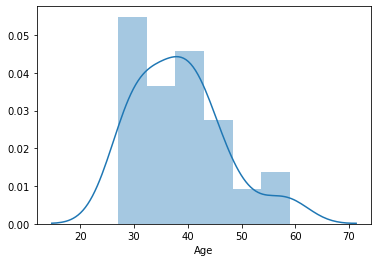

In [19]:
sns.distplot(second[second.TotalWorkingYears==7]['Age'])

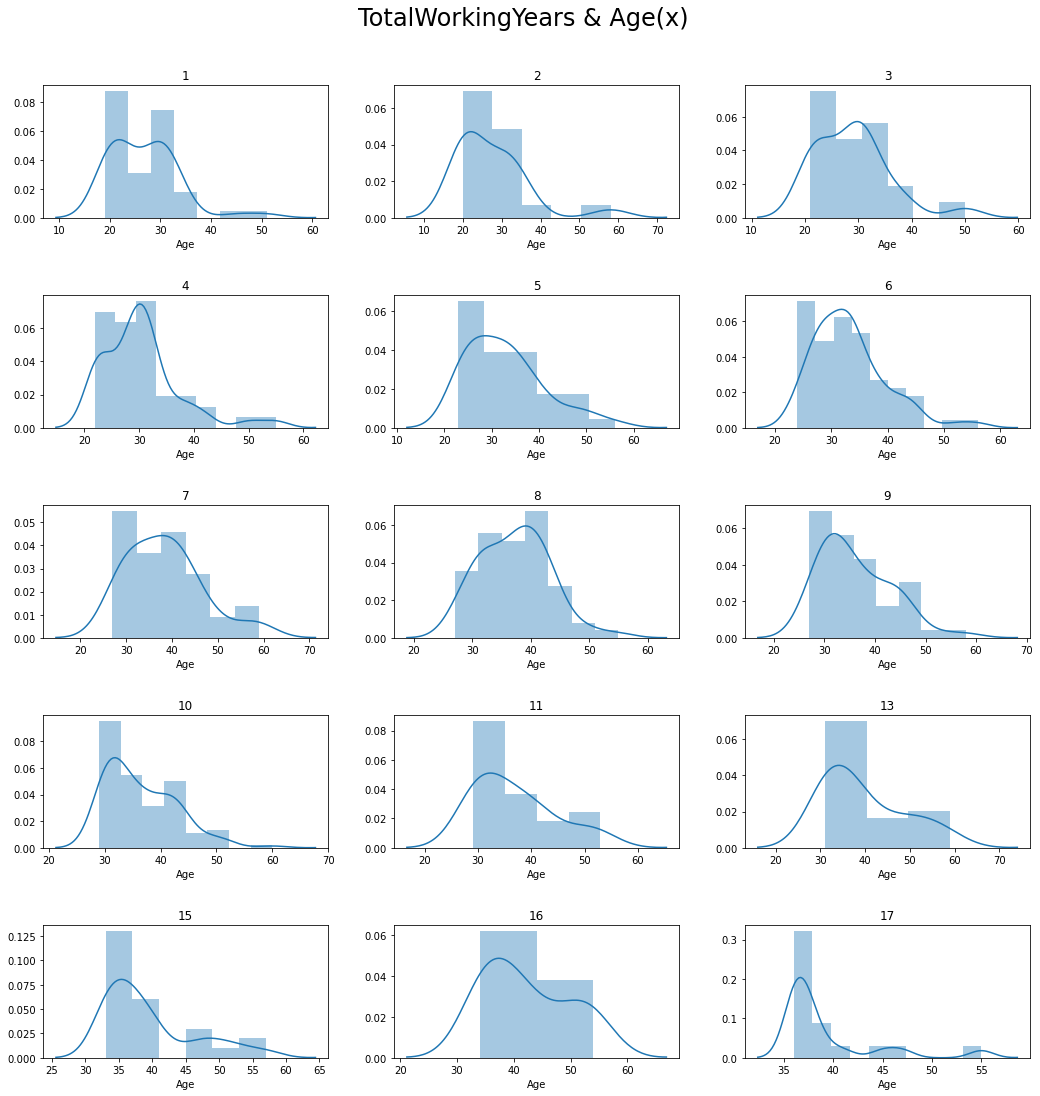

In [20]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
fig.suptitle('TotalWorkingYears & Age(x)', y=1.03, fontsize=24)

count = 0
for i in range(5):
    for j in range(3):
        sns.distplot(ax=axes[i][j], a=second[second.TotalWorkingYears==x[count]]['Age'])
#         axes[i][j].set_title('TotalWorkingYears', str(x[count])) --------> Tidak bisa di-concat
        axes[i][j].set_title(str(x[count]))
        count += 1
fig.subplots_adjust(top=2)
fig.tight_layout(pad=3.0)
plt.show()

**Temuan** : Jika dilihat dari grafik diatas, hanya kurva distribusi Age pada TotalWorkingYears=8 yang hampir menyerupai bell shape.

Untuk memastikan hal tersebut, kita akan lakukan uji normalitas menggunakan Anderson-Darling test.
Anderson-Darling bekerja sebagai berikut.

- Jika Anderson stat < critical value, maka terima H0, yang artinya data berdistribusi normal
- Jika Anderson stat > critical value, maka tolak H0 (terima HA), yang artinya data tidak berdistribusi normal

In [21]:
def anderson_normality_test(data):
    result = {'Anderson' : {i : j for i,j in zip(anderson(data)[2],anderson(data)[1])}}
    result['Anderson']['statistic'] = anderson(data)[0]
    return result

def anderson_result_extractor(raw_anderson_result, significance_level):
    anderson_stat = raw_anderson_result['Anderson']['statistic']
    critical_value = raw_anderson_result['Anderson'][significance_level]
    accepted_hypothesis = ''
    if anderson_stat < critical_value:
        accepted_hypothesis = 'H0'
    else:
        accepted_hypothesis = 'HA'
    return anderson_stat, critical_value, accepted_hypothesis

Kita akan gunakan data second karena data tersebut telah bersih dari NaN values di TotalWorkingYears dan Age

In [22]:
totalworkingyears_arr = []
anderson_stat_arr = []
crit_val_arr = []
accepted_hypothesis_arr = []
result_arr = []

for i in x:
    totalworkingyears_arr.append(i)

    data = second[second.TotalWorkingYears==i]['Age']
    raw = anderson_normality_test(data)
    
    anderson_stat, crit_val, accepted_hypothesis = anderson_result_extractor(raw, 5)
    anderson_stat_arr.append(anderson_stat)
    crit_val_arr.append(crit_val)
    accepted_hypothesis_arr.append(accepted_hypothesis)

    if accepted_hypothesis == 'H0':        
        result_arr.append('Berdistribusi normal')
    else:
        result_arr.append('Tidak berdistribusi normal')

normality_df = pd.DataFrame({
    'TotalWorkingYears': totalworkingyears_arr,
    'Anderson Statistic': anderson_stat_arr,
    'Critical Value': crit_val_arr,
    'Accepted Hypothesis': accepted_hypothesis_arr,
    'Result': result_arr
})

print('Significance Level = 5%')
normality_df

Significance Level = 5%


,TotalWorkingYears,Anderson Statistic,Critical Value,Accepted Hypothesis,Result
0,1,1.370716,0.736,HA,Tidak berdistribusi normal
1,2,1.342224,0.690,HA,Tidak berdistribusi normal
2,3,0.699117,0.696,HA,Tidak berdistribusi normal
3,4,1.478223,0.729,HA,Tidak berdistribusi normal
4,5,0.965126,0.728,HA,Tidak berdistribusi normal
5,6,1.417438,0.748,HA,Tidak berdistribusi normal
6,7,0.643988,0.727,H0,Berdistribusi normal
7,8,0.458056,0.744,H0,Berdistribusi normal
8,9,1.247508,0.737,HA,Tidak berdistribusi normal
9,10,2.897089,0.762,HA,Tidak berdistribusi normal


**Temuan** : Pada uji normalitas Anderson-Darling dengan significance level 5%, ditemukan bahwa selain TotalWorkingYears=8, Age pada TotalWorkingYears=7 juga dinyatakan berdistribusi normal.

Oleh karena itu, pada NaN value yang TotalWorkingYears bernilai 7 atau 8, akan diisi dengan mean. Sementara NaN value dari TotalWorkingYears lainnya akan diisi dengan median.

In [23]:
imputer_val_arr = []
for i in x:
    source = second[second.TotalWorkingYears==i]['Age']
    if i == 7 or i == 8:
        imputer_val_arr.append(int(source.mean()))
    else:
        imputer_val_arr.append(int(source.median()))

zip_iter = zip(x, imputer_val_arr)
age_val_imputer = dict(zip_iter)
age_val_imputer

{1: 27,
 2: 23,
 3: 29,
 4: 30,
 5: 32,
 6: 32,
 7: 38,
 8: 37,
 9: 34,
 10: 36,
 11: 34,
 13: 36,
 15: 36,
 16: 41,
 17: 37}

Dictionary di atas inilah yang akan membantu kita untuk mengisi NaN value pada feature Age.
Misal, kita menemukan ada NaN pada Age dan pada TotalWorkingYearsnya bernilai 9, maka NaN valuenya akan diisi dengan 34.

In [24]:
nan_age = df[df.Age.isna()][['Age', 'TotalWorkingYears']]
nan_age

,Age,TotalWorkingYears
8,NaN,5
23,NaN,9
24,NaN,10
29,NaN,8
32,NaN,8
...,...,...
1004,NaN,10
1006,NaN,6
1011,NaN,5
1015,NaN,10


In [25]:
def fill_age(x):
    if np.isnan(x['Age']):
        return age_val_imputer[x['TotalWorkingYears']]
    else:
        return x['Age']

In [26]:
df.Age = df.apply(fill_age,axis=1)

In [27]:
df.iloc[nan_age.index, : ][['Age', 'TotalWorkingYears']]

,Age,TotalWorkingYears
8,32.0,5
23,34.0,9
24,36.0,10
29,37.0,8
32,37.0,8
...,...,...
1004,36.0,10
1006,32.0,6
1011,32.0,5
1015,36.0,10


### DistanceFromHome

Pada Heatmap, kita bisa melihat bahwa DistanceFromHome tidak berkorelasi kuat dengan feature manapun. Oleh karenanya, kita harus melihat bagaimana distribusinya.

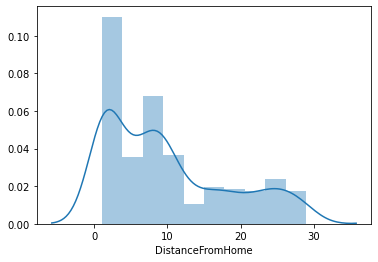

In [28]:
sns.distplot(df.DistanceFromHome)

**Temuan** : Distplot tersebut menunjukkan bahwa distribusi dari DistanceFromHome berbentuk Right Skewed, tidak normal.

Kita bisa menggunakan median pada kasus ini untuk mengisi NaN values.


In [29]:
df['DistanceFromHome'].fillna(int(df['DistanceFromHome'].median()), inplace=True)

### DailyRate

Sama seperti DistanceFromHome, DailyRate juga tidak memiliki korelasi yang kuat dengan feature yang lainnya. Jadi, kita periksa distribusinya.

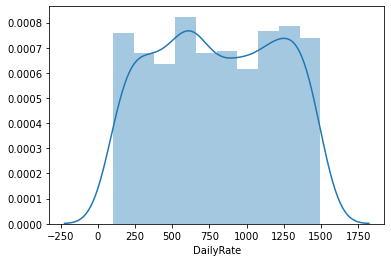

In [30]:
sns.distplot(df.DailyRate)

**Temuan** : Distplot dari DistanceFromHome merupakan kurva bimodal.

Namun akan dicek ulang melalui uji normal untuk memastikan bahwa distribusinya benar tidak normal.  

In [31]:
x = df[~df.DailyRate.isna()]['DailyRate']
anderson_stat, crit_val, accepted_hypothesis = anderson_result_extractor(anderson_normality_test(x), 5)
accepted_hypothesis

'HA'

Hasilnya adalah Hipotesis Alternatif diterima. Maka data tersebut berdistribusi tidak normal.

Serupa seperti DistanceFromHome, akan kita gunakan median.

In [32]:
df['DailyRate'].fillna(int(df['DailyRate'].median()), inplace=True)

### BusinessTravel & MaritalStatus

In [33]:
custom_info(df, mode='missing_values_only')

,dataFeatures,dataType,null,nullPct
0,BusinessTravel,object,5,0.49
1,MaritalStatus,object,5,0.49


Sekarang yang tersisa adalah BusinessTravel dan MaritalStatus. Namun 2 feature ini tidak terlihat pada Heatmap dikarenakan ia adalah object. Agar kita bisa melihat korelasi 2 feature ini, kita tweak dtype-nya terlebih dahulu, supaya dapat terlihat pada heatmap.

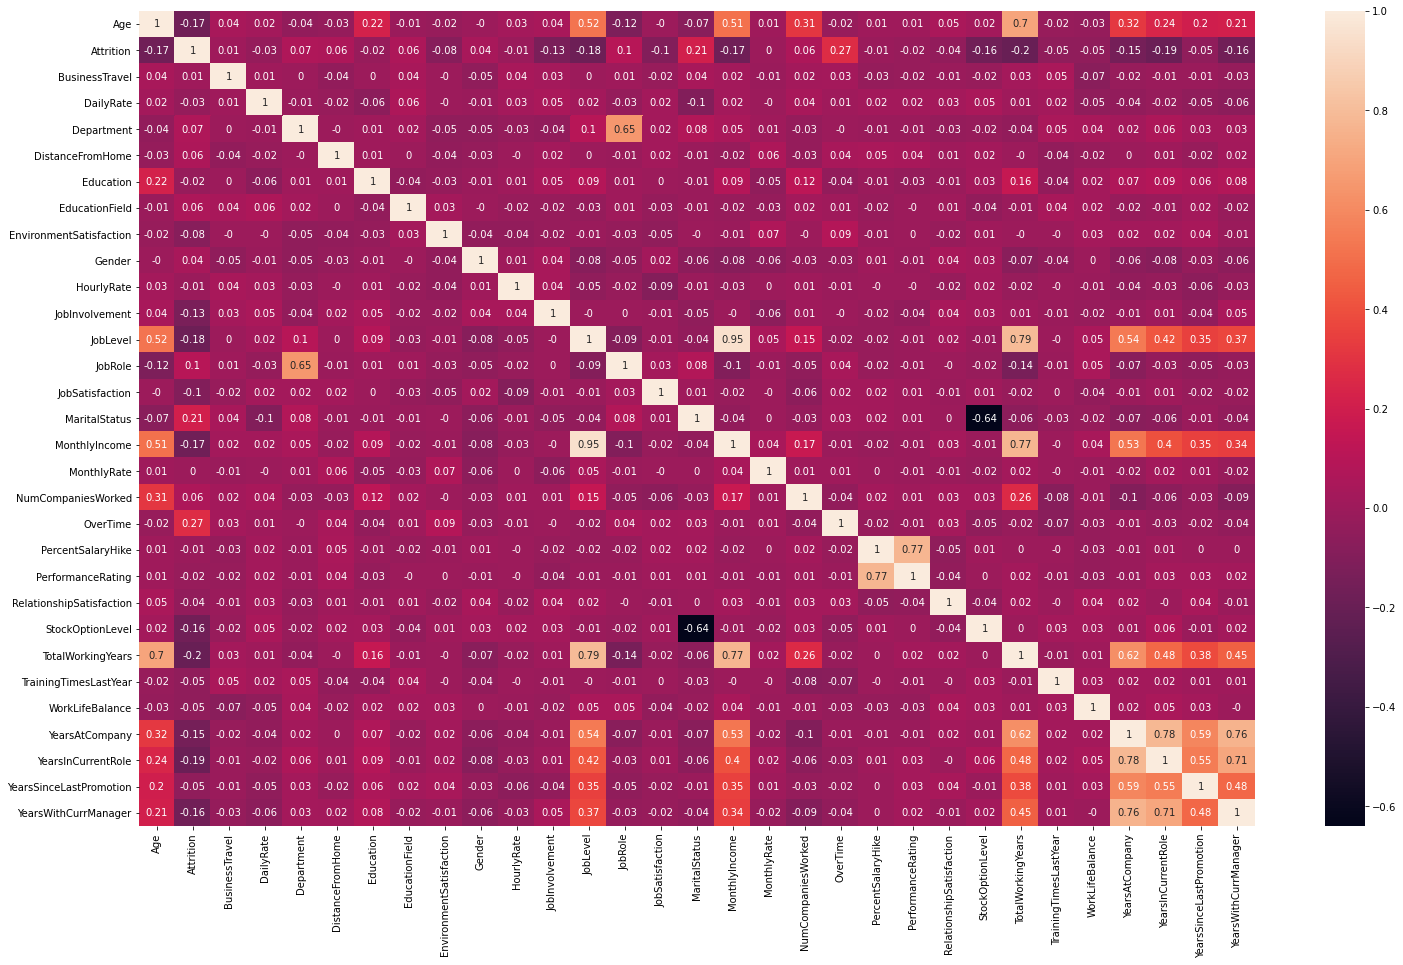

In [34]:
temp = categorical_converter(df)

plt.figure(figsize=(25,15))
sns.heatmap(round(temp.corr(),2),annot=True)
plt.show()

**Temuan** :

- BusinessTravel tidak berkorelasi kuat dengan feature manapun. 

- MaritalStatus berkorelasi terbalik dengan StockOptionLevel.

In [35]:
x = df.StockOptionLevel.unique().tolist()
x

[1, 2, 0, 3]

In [36]:
df.MaritalStatus.unique()

array(['Divorced', 'Single', 'Married', nan], dtype=object)

In [37]:
ct = pd.crosstab(df['StockOptionLevel'],df['MaritalStatus'],dropna=True).T
ct

StockOptionLevel,0,1,2,3
MaritalStatus,,,,
Divorced,6,133,54,37
Married,106,280,56,32
Single,320,0,0,0


**Temuan** : Semua pegawai yang bertatus Single, StockOptionLevel-nya adalah 0

In [38]:
imputer_val_arr = []
for i in x:
    imputer_val_arr.append(ct[i].idxmax())

zip_iter = zip(x, imputer_val_arr)
marital_val_imputer = dict(zip_iter)
marital_val_imputer

{1: 'Married', 2: 'Married', 0: 'Single', 3: 'Divorced'}

In [39]:
nan_ms = df[df.MaritalStatus.isna()][['MaritalStatus', 'StockOptionLevel']]
nan_ms

,MaritalStatus,StockOptionLevel
10,NaN,1
89,NaN,1
105,NaN,1
107,NaN,2
150,NaN,1


In [40]:
def fill_marital(df):
    if pd.isnull(df['MaritalStatus']):
        return marital_val_imputer[df.StockOptionLevel]
    else:
        return df['MaritalStatus']

In [41]:
df.MaritalStatus = df.apply(fill_marital,axis=1)

In [42]:
df.iloc[ nan_ms.index , : ][['StockOptionLevel','MaritalStatus']]

,StockOptionLevel,MaritalStatus
10,1,Married
89,1,Married
105,1,Married
107,2,Married
150,1,Married


Sekarang tersisa BusinessTravel. Karena BusinessTravel tidak berkorelasi kuat dengan feature manapun, maka akan digunakan modus untuk pengisian NaN values.

In [43]:
df.BusinessTravel.value_counts()

Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64

In [44]:
df['BusinessTravel'].fillna(df.BusinessTravel.dropna().mode()[0], inplace = True)

Pastikan bahwa sudah tidak ada lagi missing values.

In [45]:
custom_info(df, mode='missing_values_only')

,dataFeatures,dataType,null,nullPct


# Export

In [46]:
import os
os.chdir('csv')
df.to_csv("imputed.csv", index=False)